## Linear Regression Bike Sharing

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Step 1: Data Understanding

In [371]:
# Suppress warnings to avoid unnecessary output during the execution
import warnings
warnings.filterwarnings('ignore')

# Import essential libraries for data manipulation, visualization, and machine learning
import numpy as np            # For numerical operations
import pandas as pd           # For data handling and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns         # For advanced statistical data visualizations

# Importing required modules from sklearn for model training and data preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler       # For feature scaling (normalization)
from sklearn.feature_selection import RFE            # For recursive feature elimination (feature selection)
from sklearn.linear_model import LinearRegression     # For building linear regression models

# Import statsmodels for advanced statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF (Variance Inflation Factor)
import statsmodels.api as sm     # For statistical modeling in Python

# Import r2_score for evaluating model performance in terms of R-squared value
from sklearn.metrics import r2_score


In [372]:
# Define the path to the CSV file containing the dataset
file_path = 'C:\\Users\\RS24050\\Desktop\\day.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


In [373]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()  # This function will show the first 5 rows by default, helping you get an overview of the dataset


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [374]:
# Checking the shape of dataframe

df.shape

(730, 16)

In [375]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [376]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [377]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [378]:
# Renaming specific columns in the DataFrame for better readability
df.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

# The 'inplace=True' modifies the original DataFrame directly without needing to assign it back to df


In [379]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [380]:
# Dropping the Duplicates

df.drop_duplicates(inplace=True)

In [381]:
# Dropping unwanted columns that are not necessary for the analysis
# 'instant' is just an index for the row, so it's not needed.
# 'dteday' contains date information, which can be derived from the 'year' and 'month' columns.
# 'casual' and 'registered' are category breakdowns for the 'cnt' column, which we don't need separately.

df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# The 'axis=1' specifies we are dropping columns (not rows), and 'inplace=True' modifies the original DataFrame


In [382]:
# Mapping the numerical values in the 'season' column to their corresponding season names
df.season = df.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# This changes the 'season' column from numerical values to their respective season names


In [383]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [384]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [385]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [386]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [387]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

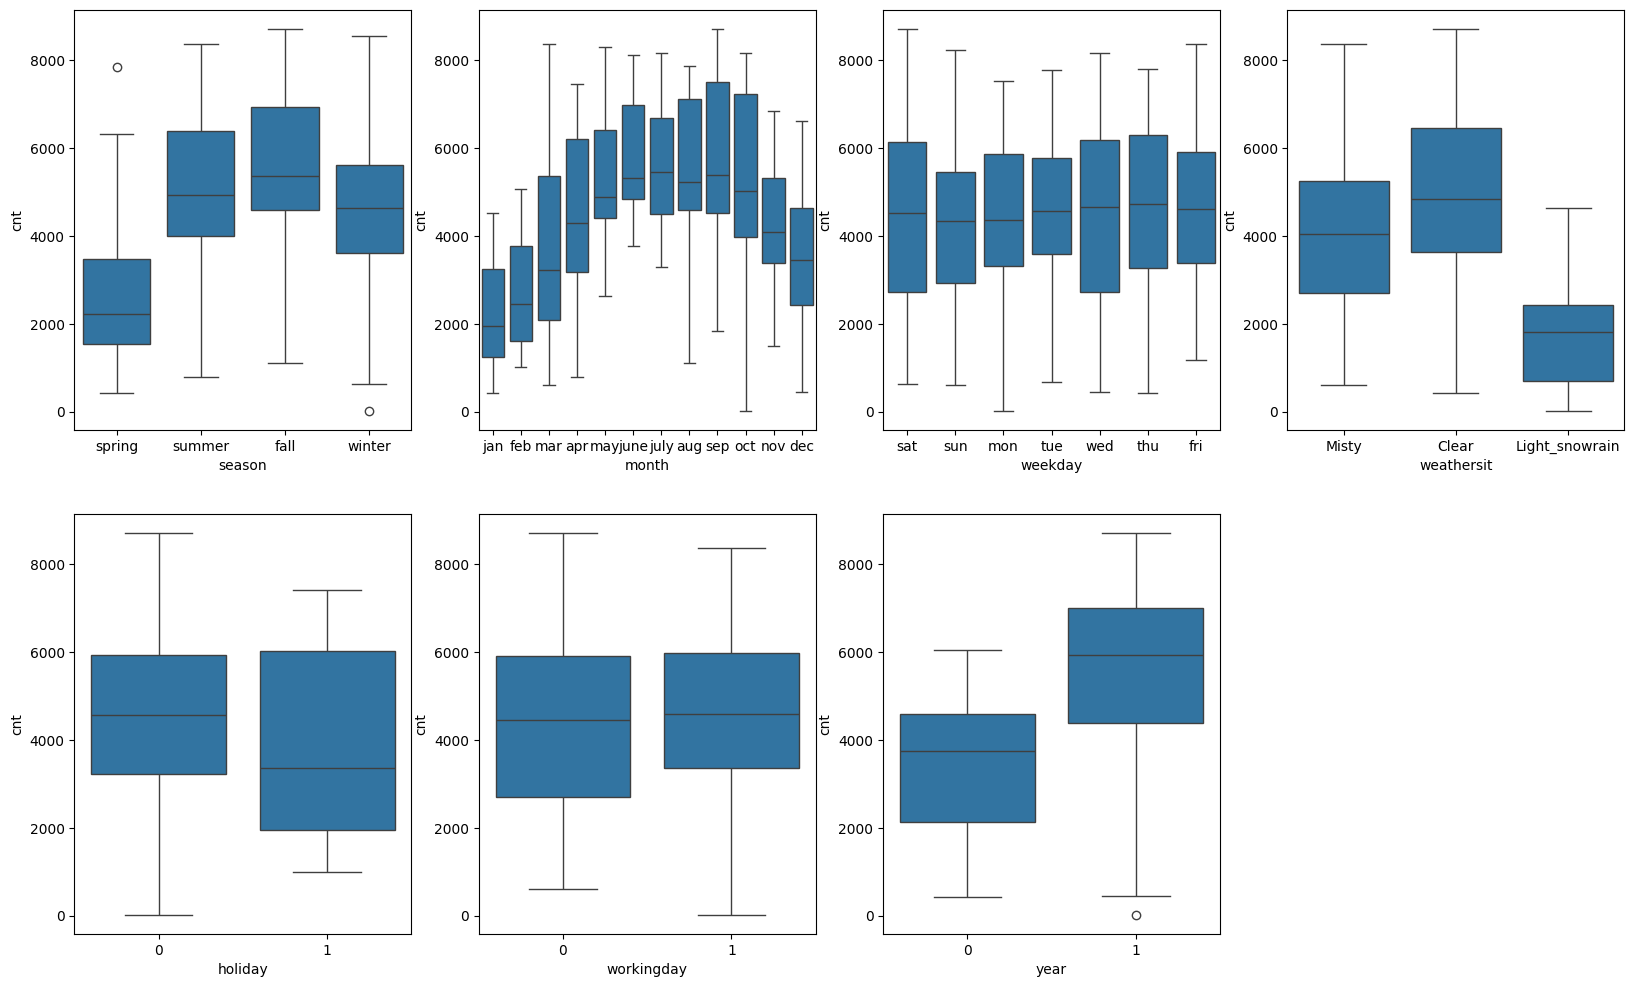

In [388]:
# Analyzing and visualizing the categorical columns to explore how each predictor variable relates to the target variable 'cnt'
# Boxplots will show the distribution of 'cnt' for each category of the predictor variables

# Set the size of the overall figure
plt.figure(figsize=(20, 12))

# Create subplots to visualize the relationship between each categorical variable and the target 'cnt'
plt.subplot(2, 4, 1)  # First subplot
sns.boxplot(x='season', y='cnt', data=df)  # Boxplot for 'season' vs 'cnt'

plt.subplot(2, 4, 2)  # Second subplot
sns.boxplot(x='month', y='cnt', data=df)   # Boxplot for 'month' vs 'cnt'

plt.subplot(2, 4, 3)  # Third subplot
sns.boxplot(x='weekday', y='cnt', data=df)  # Boxplot for 'weekday' vs 'cnt'

plt.subplot(2, 4, 4)  # Fourth subplot
sns.boxplot(x='weathersit', y='cnt', data=df)  # Boxplot for 'weathersit' vs 'cnt'

plt.subplot(2, 4, 5)  # Fifth subplot
sns.boxplot(x='holiday', y='cnt', data=df)  # Boxplot for 'holiday' vs 'cnt'

plt.subplot(2, 4, 6)  # Sixth subplot
sns.boxplot(x='workingday', y='cnt', data=df)  # Boxplot for 'workingday' vs 'cnt'

plt.subplot(2, 4, 7)  # Seventh subplot
sns.boxplot(x='year', y='cnt', data=df)  # Boxplot for 'year' vs 'cnt'

# Display the plots
plt.show()


In [389]:
# Function to create bar plots for categorical columns and visualize the relationship with the target variable 'cnt'
# It will create two subplots: one for the overall bar plot, and one split by 'year'

def plot_cat_columns(column):
    # Set the figure size for the plots
    plt.figure(figsize=(12, 6))
    
    # First subplot: Basic barplot showing the relationship between the categorical column and the target 'cnt'
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)  # Barplot for the selected categorical column vs 'cnt'
    
    # Second subplot: Barplot split by 'year', using 'Set1' color palette for distinction
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='year', palette='Set1')  # Barplot with 'year' as a hue
    
    # Adding a legend to indicate which color corresponds to each year (2018 and 2019)
    plt.legend(labels=['2018', '2019'])
    
    # Display the plots
    plt.show()


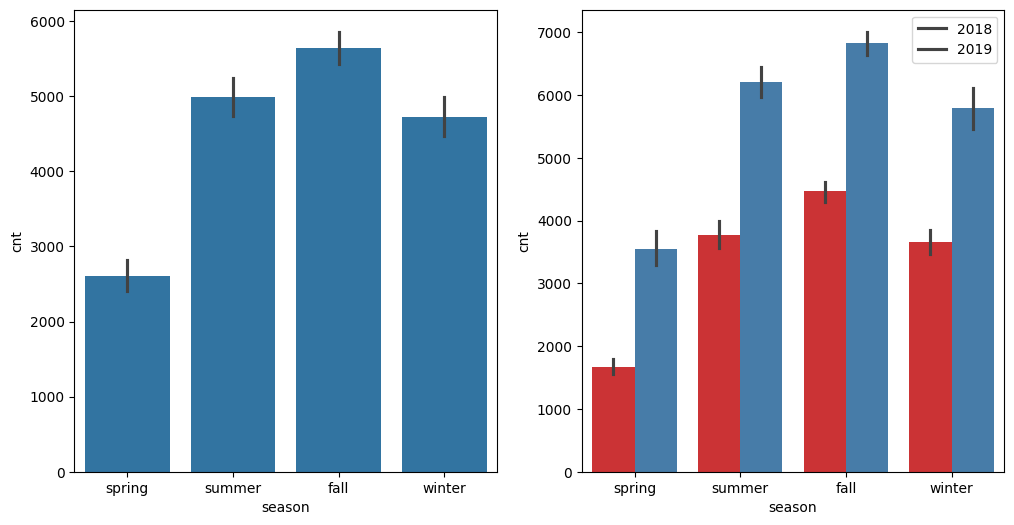

In [390]:
# Plotting the barplot visualizations for the 'season' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('season')  # Calling the function defined earlier with 'season' as the categorical column


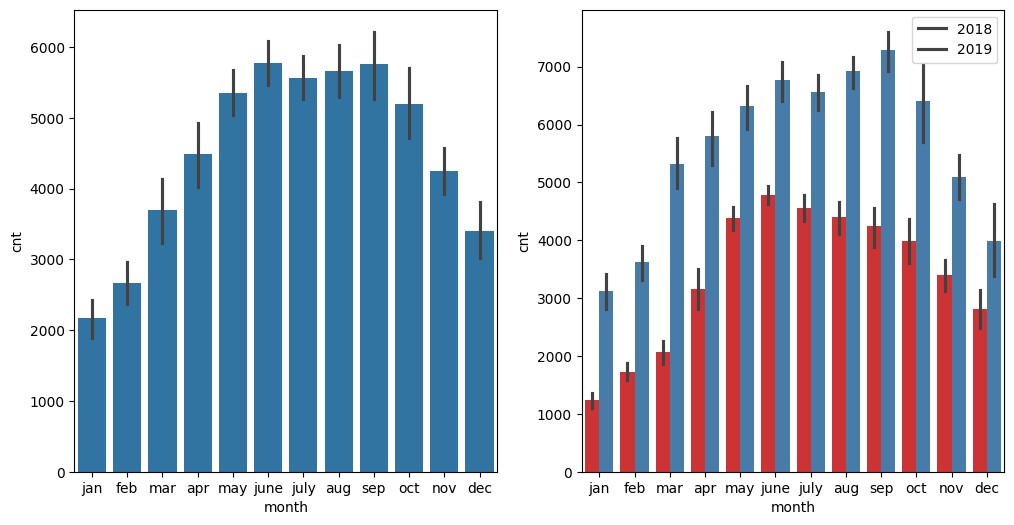

In [391]:
# Plotting the barplot visualizations for the 'month' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('month')  # Calling the function defined earlier with 'month' as the categorical column


Most of the bookings were made during the months of May, June, July, August, September, and October. The trend shows an increase in bookings from the beginning of the year, peaking around the middle of the year, and then a decline as the year progresses towards the end. Additionally, the number of bookings for each month appears to have increased from 2018 to 2019.

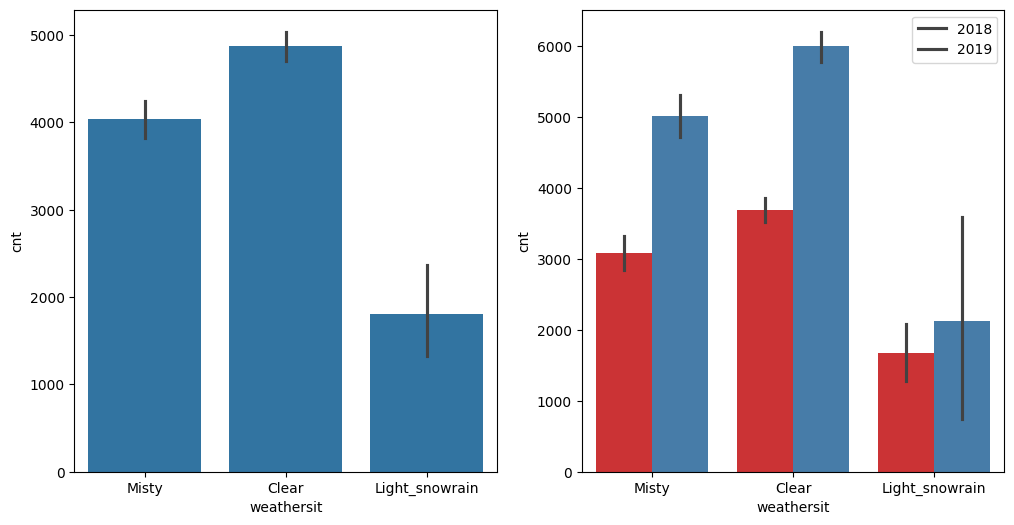

In [392]:
# Plotting the barplot visualizations for the 'weathersit' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('weathersit')  # Calling the function defined earlier with 'weathersit' as the categorical column


Clear weather attracted more bookings, which is quite expected. Additionally, compared to the previous year (2018), bookings increased across all weather conditions in 2019.

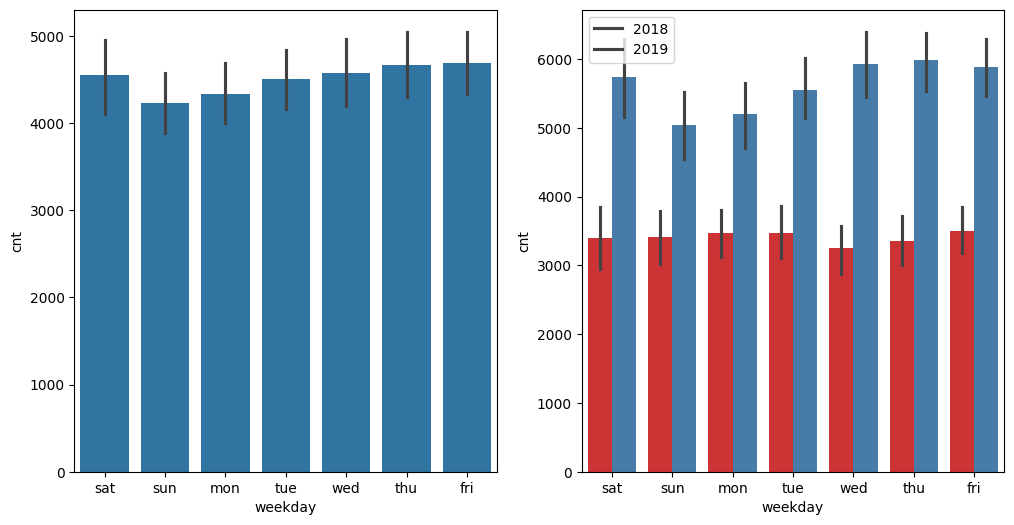

In [393]:
# Plotting the barplot visualizations for the 'weekday' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('weekday')  # Calling the function defined earlier with 'weekday' as the categorical column


Thursday, Friday, Saturday, and Sunday have a higher number of bookings compared to the start of the week.

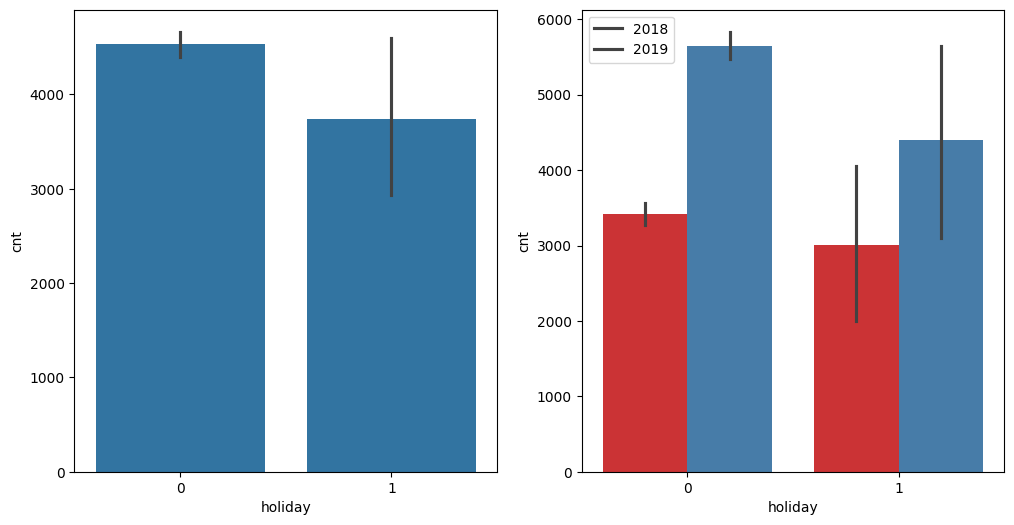

In [394]:
# Plotting the barplot visualizations for the 'holiday' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('holiday')  # Calling the function defined earlier with 'holiday' as the categorical column


Bookings appear to be lower when it's not a holiday, which is reasonable since people are likely to spend time at home and enjoy with family during holidays.

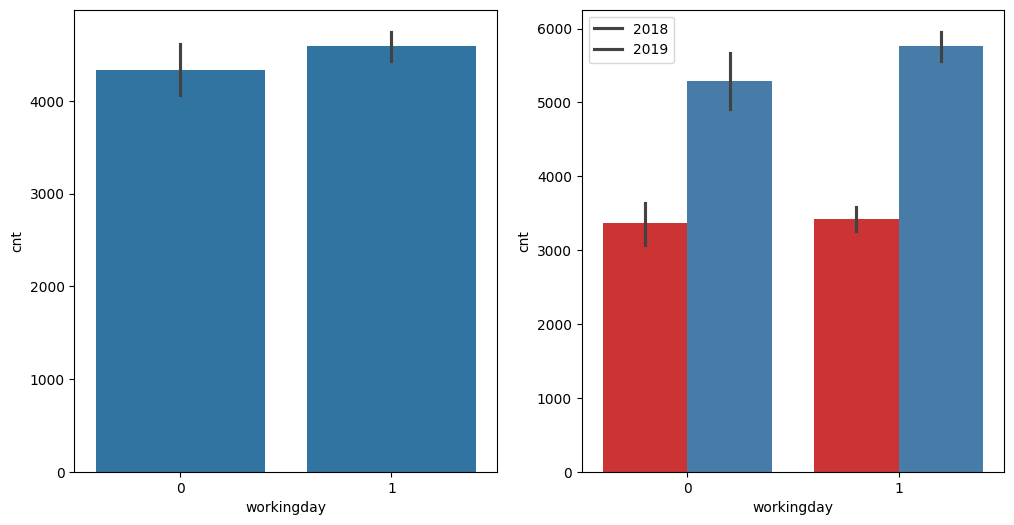

In [395]:
# Plotting the barplot visualizations for the 'workingday' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('workingday')  # Calling the function defined earlier with 'workingday' as the categorical column

Bookings appear to be nearly the same on both working and non-working days. However, there was an increase in the booking count from 2018 to 2019.

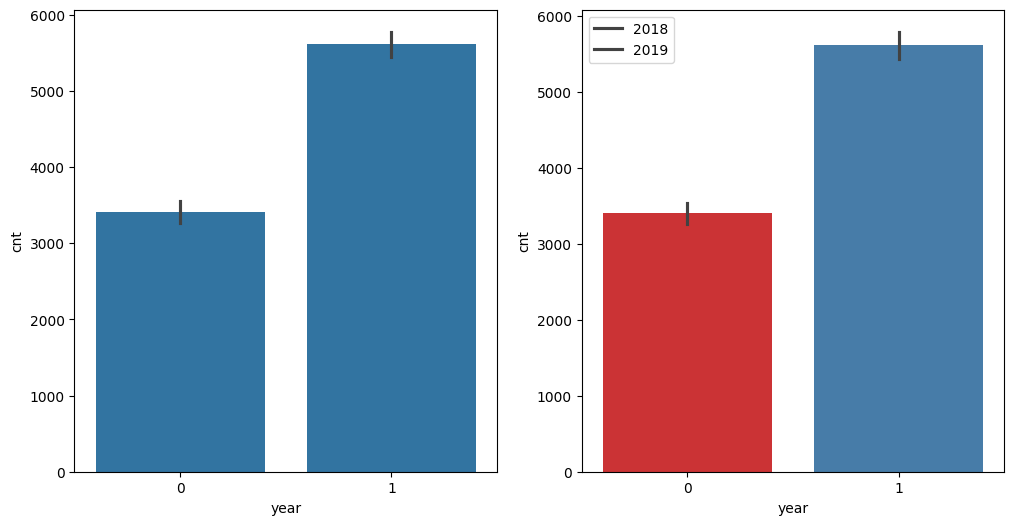

In [396]:
# Plotting the barplot visualizations for the 'year' column to explore its relationship with the target variable 'cnt'
plot_cat_columns('year')  # Calling the function defined earlier with 'year' as the categorical column


2019 saw a higher number of bookings compared to the previous year, indicating positive progress in terms of business growth.

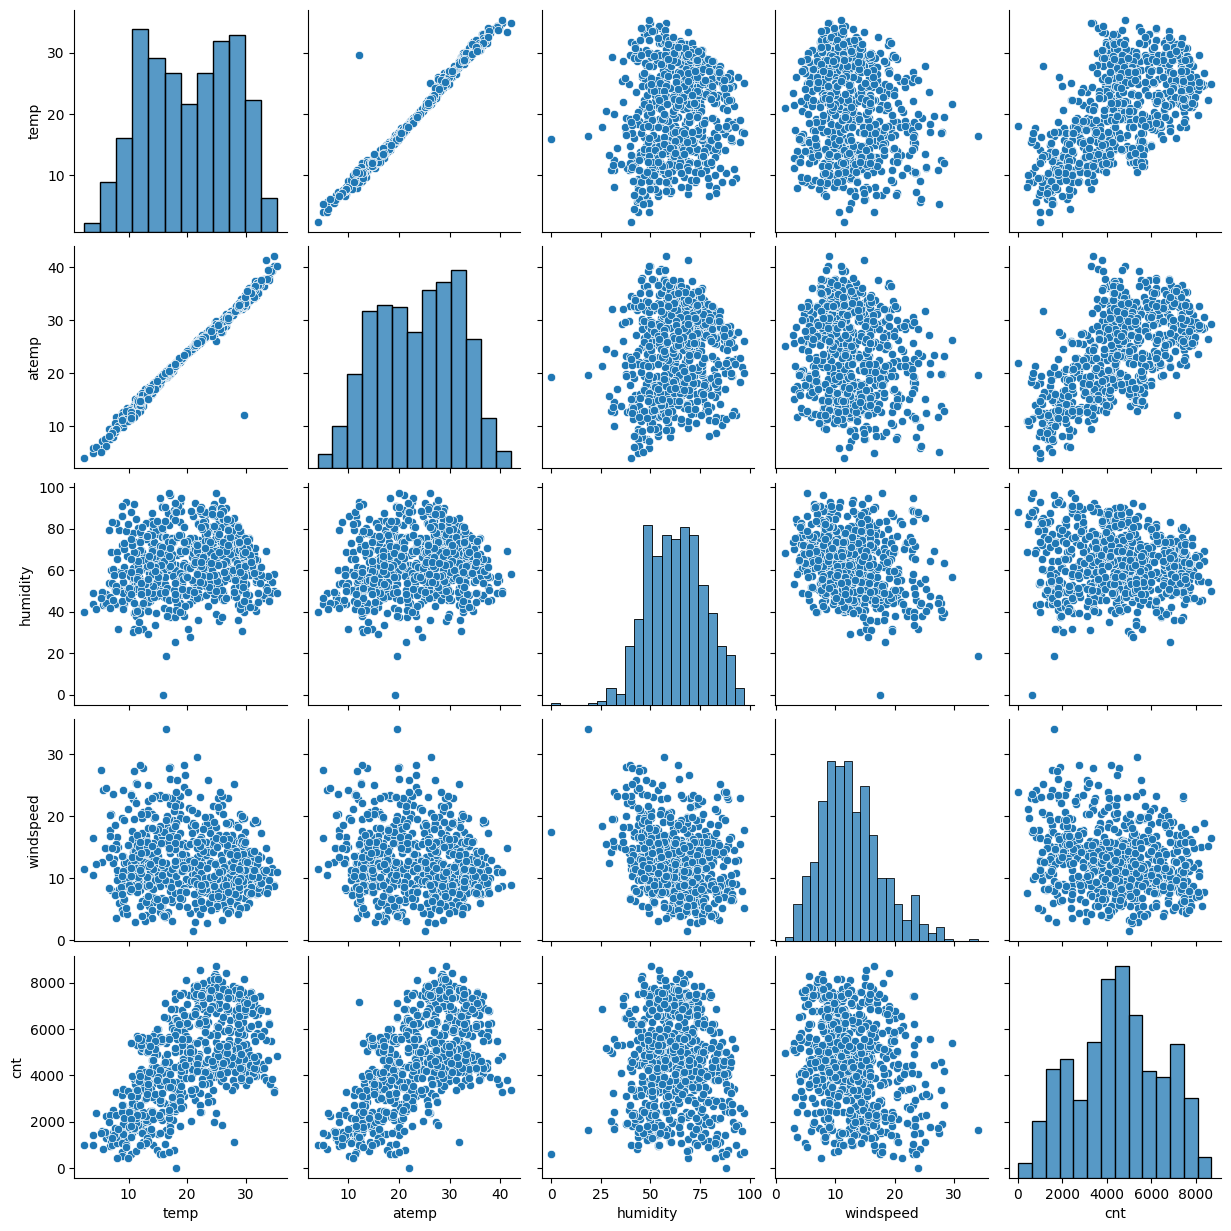

In [397]:
# Analyzing and visualizing the relationships between the numerical columns in the dataset

# Create a pairplot to visualize the relationships between the variables: 'temp', 'atemp', 'humidity', 'windspeed', and 'cnt'
sns.pairplot(data=df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])

# Display the pairplot
plt.show()


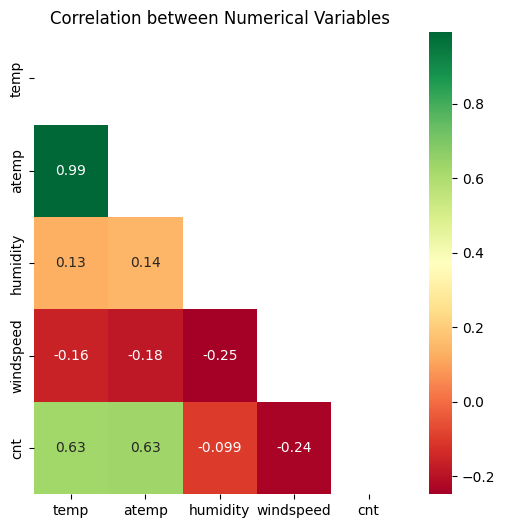

In [398]:
# Checking and visualizing the correlation between the numerical variables

# Set the size of the heatmap figure
plt.figure(figsize=(6, 6))

# Create a mask to display only the upper triangle of the correlation matrix (for better readability)
matrix = np.triu(df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr())

# Generate a heatmap to visualize the correlation between the numerical variables, with annotations and a custom color map
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot=True, cmap="RdYlGn", mask=matrix)

# Add a title to the heatmap
plt.title("Correlation between Numerical Variables")

# Display the heatmap
plt.show()


#### There is a linear relationship between 'temp' and 'atemp', which indicates multicollinearity. As a result, both parameters cannot be used simultaneously in the model. We will decide which variables to retain based on their Variance Inflation Factor (VIF) and p-values with respect to the other variables.

## Step 3: Data Preparation

In [399]:
# Creating dummy variables for categorical columns: 'month', 'weekday', 'weathersit', and 'season'
# Drop the first category to avoid the dummy variable trap (multicollinearity)

# Generate dummy variables for 'month', dropping the first category to avoid multicollinearity
months_df = pd.get_dummies(df.month, drop_first=True)

# Generate dummy variables for 'weekday', dropping the first category to avoid multicollinearity
weekdays_df = pd.get_dummies(df.weekday, drop_first=True)

# Generate dummy variables for 'weathersit', dropping the first category to avoid multicollinearity
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)

# Generate dummy variables for 'season', dropping the first category to avoid multicollinearity
seasons_df = pd.get_dummies(df.season, drop_first=True)

In [400]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [401]:
# Merging the original dataframe with the newly created dummy variable dataframes
# Concatenating the dummy variable columns (months_df, weekdays_df, weathersit_df, seasons_df) along the columns (axis=1)
df_new = pd.concat([df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)


In [402]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [403]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [404]:
# Dropping the original categorical columns ('season', 'month', 'weekday', 'weathersit') 
# as they have already been converted into dummy variables
df_new.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

In [405]:
# Checking the first few rows of the newly updated dataframe (df_new) to verify the changes
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [406]:
# Checking the shape of the newly updated dataframe (df_new) to see the number of rows and columns
df_new.shape

(730, 30)

In [407]:
# Checking the column information of the newly updated dataframe (df_new) to understand data types and non-null values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

## Step 4: Splitting the Data into Training and Testing Sets

In [408]:
# Splitting the dataframe into training and testing sets
# Using a 70-30 split, where 70% of the data will be used for training and 30% for testing
# Random seed is set for reproducibility of the split

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.7, random_state=100)

In [409]:
# Checking the shape of the training dataset (df_train) to see the number of rows and columns
df_train.shape

(510, 30)

In [410]:
# Checking the shape of the testing dataset (df_test) to see the number of rows and columns
df_test.shape

(220, 30)

In [411]:
# Initializing the MinMaxScaler to rescale the features to a range of 0 to 1
scaler = MinMaxScaler()

In [412]:
# Verifying the first few rows of the training dataset (df_train) before applying scaling
df_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [413]:
# Applying MinMaxScaler to all the numerical columns except the 'yes-no' and 'dummy' variables
# These columns include 'temp', 'atemp', 'humidity', 'windspeed', and 'cnt'

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [414]:
# Verifying the first few rows of the training dataset (df_train) after applying the scaling to check the changes
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [415]:
# Describing the dataset to get statistical summaries of the numerical columns
df_train.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


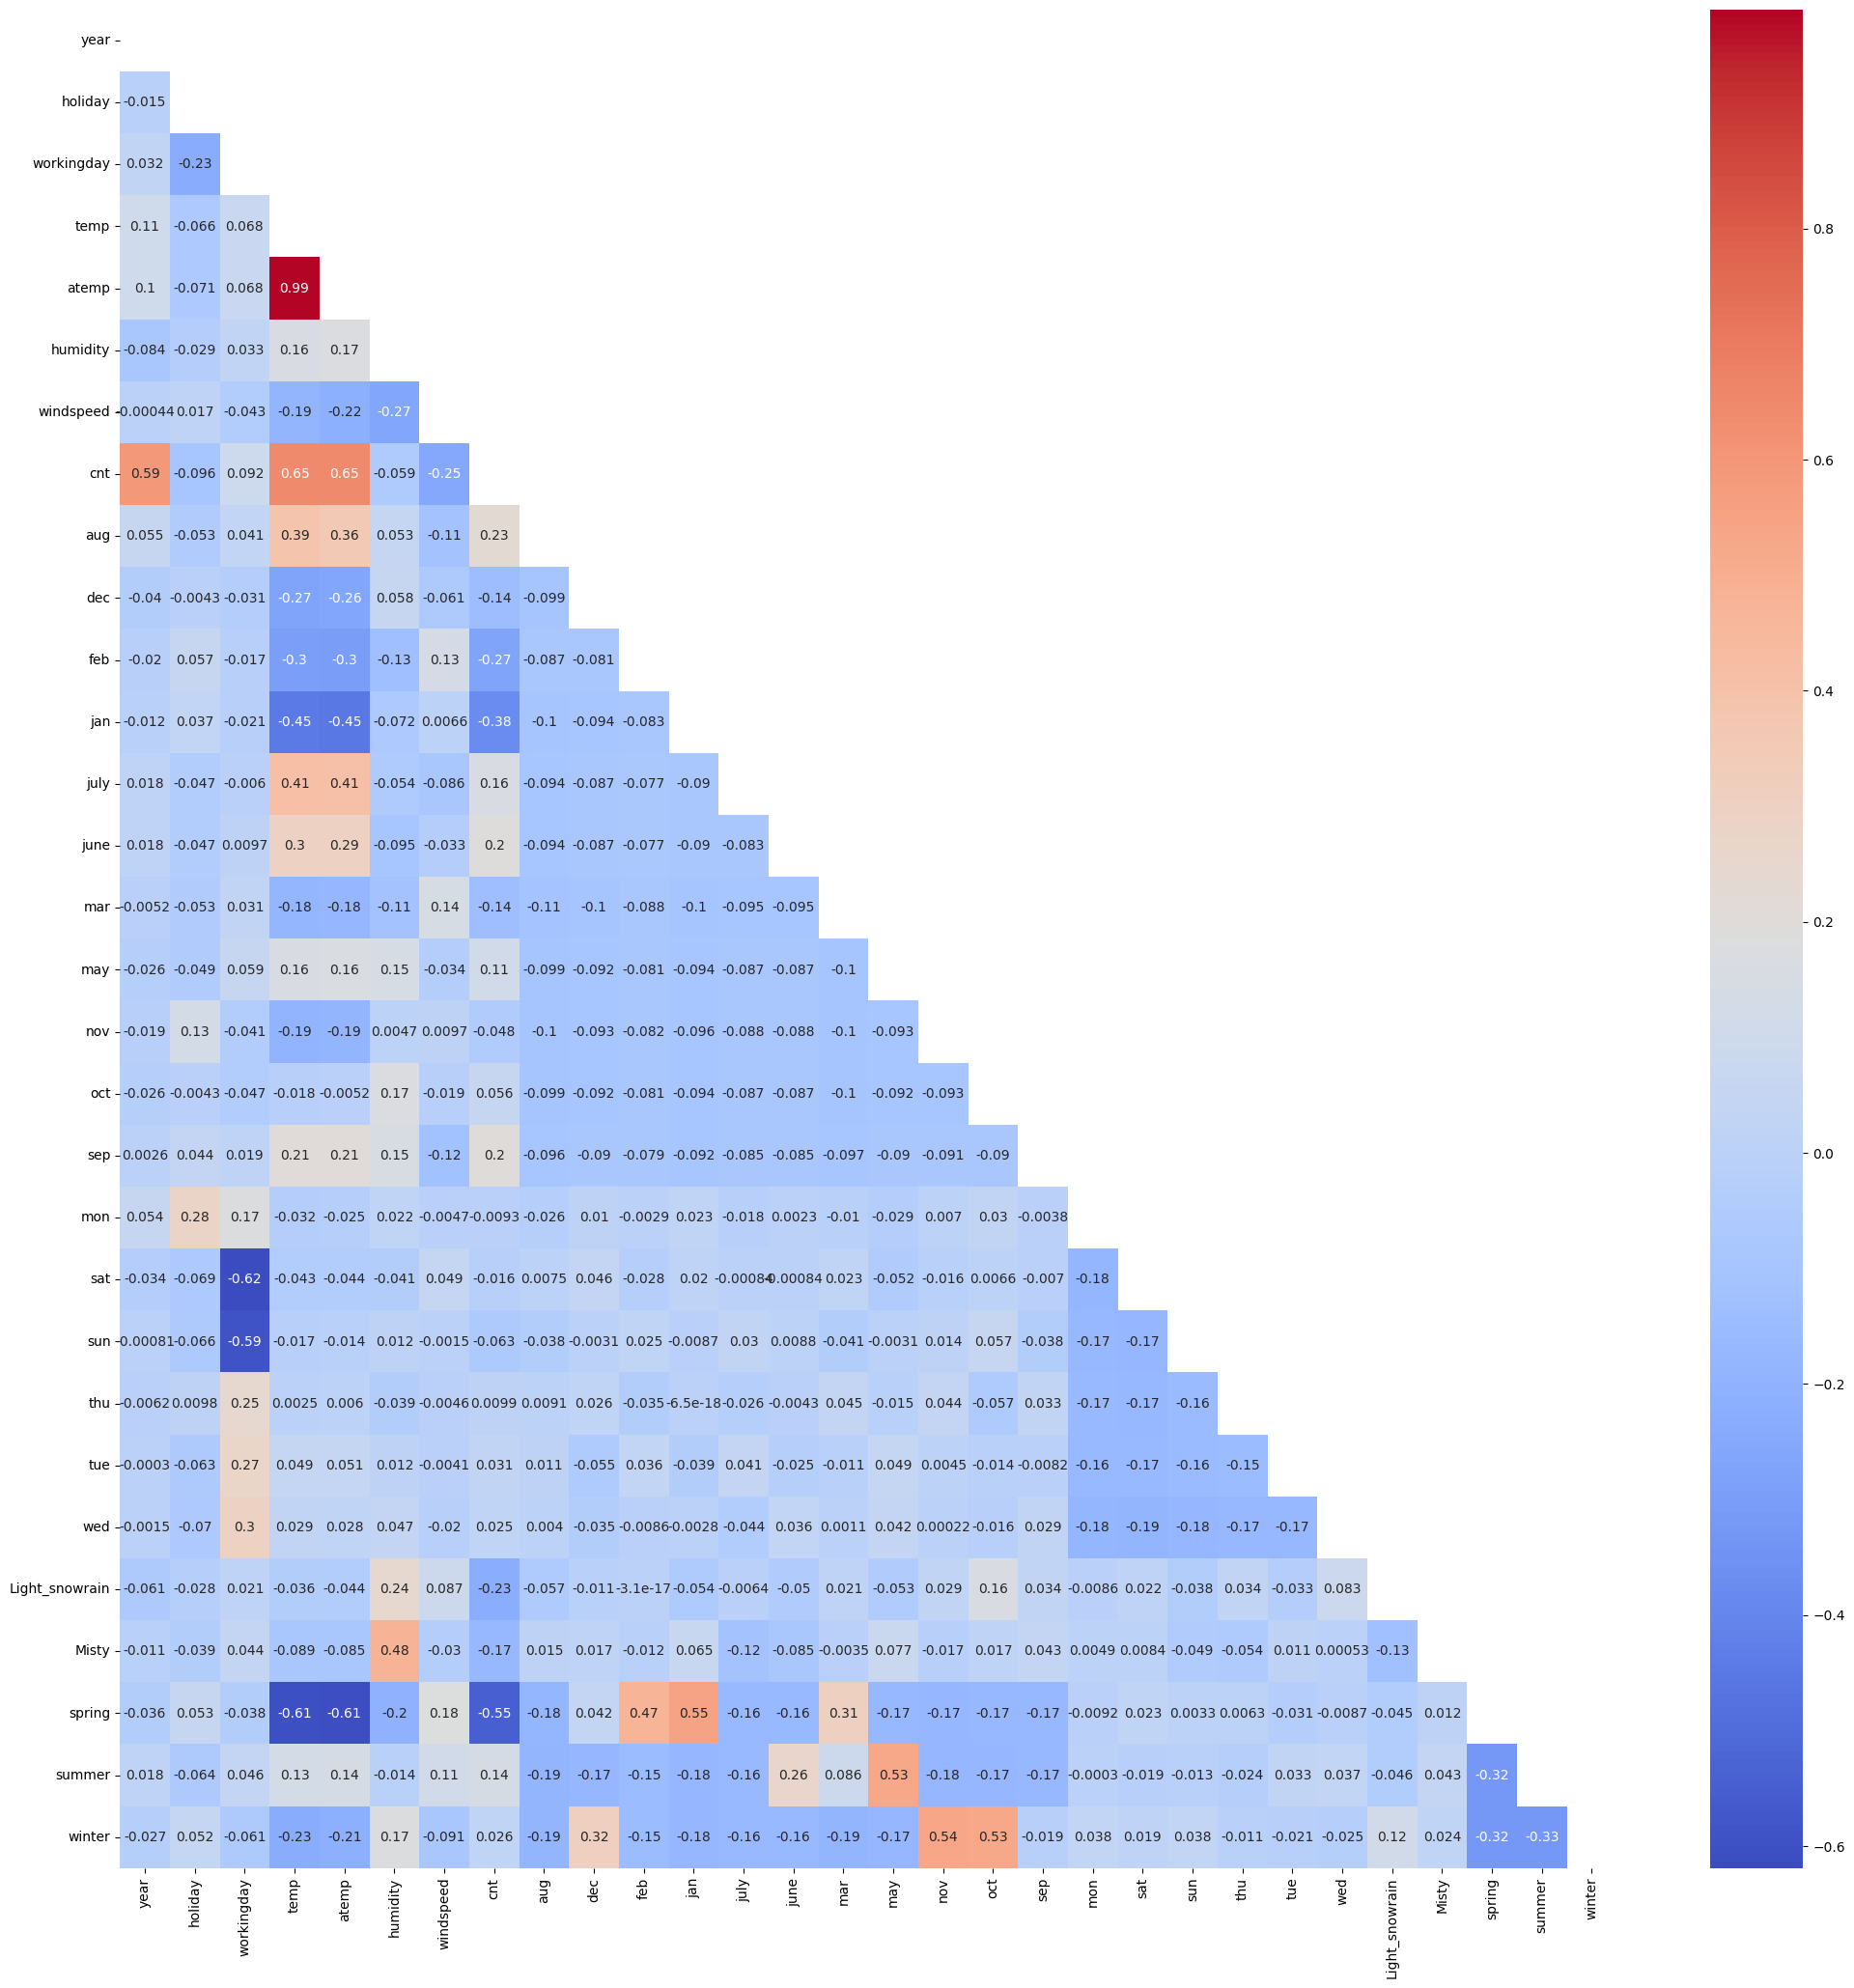

In [416]:
# Checking the correlation coefficients between numerical variables to identify highly correlated variables
plt.figure(figsize=(25, 25))
matrix = np.triu(df_train.corr())  # Masking the upper triangle for better visualization
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", mask=matrix)  # Plotting the heatmap
plt.show()


#### 'cnt' appears to be strongly correlated with the 'year' variable and 'temp'. Similarly, 'Misty' (likely referring to weather conditions) and 'humidity' show a correlation. The 'Spring' season is highly correlated with January and February, while the 'Summer' season has a good correlation with May. Finally, the 'Winter' season shows strong correlations with the October and November months.

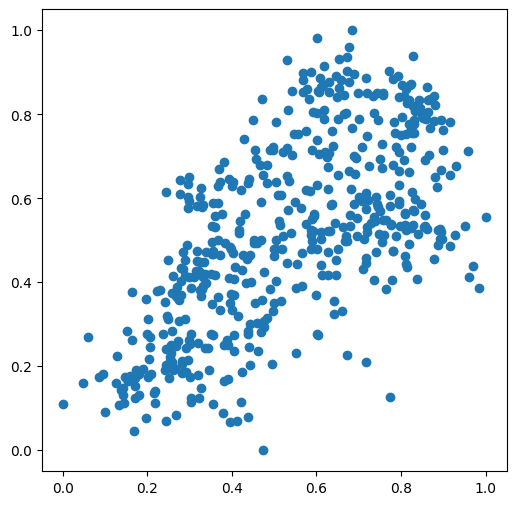

In [417]:
# Visualizing the correlation between 'temp' and 'cnt' using a scatter plot to observe the trend
plt.figure(figsize=[6, 6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms a positive correlation between 'temp' and 'cnt', where as the temperature increases, the number of bookings ('cnt') also tends to rise

In [418]:
# Splitting the data into target variable 'y_train' and predictor variables 'X_train'
y_train = df_train.pop('cnt')  # 'cnt' is the target variable
X_train = df_train  # Remaining columns are the features


In [419]:
# Recursive Feature Elimination (RFE) to select the top 15 features based on their importance
lm = LinearRegression()  # Initialize the linear regression model
lm.fit(X_train, y_train)  # Fit the model to the training data

# Perform RFE with 15 features to select
rfe = RFE(estimator=lm, n_features_to_select=15)  # Corrected the argument
rfe = rfe.fit(X_train, y_train)  # Fit RFE to the training data


In [420]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(5)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('aug', np.False_, np.int64(7)),
 ('dec', np.False_, np.int64(3)),
 ('feb', np.False_, np.int64(4)),
 ('jan', np.True_, np.int64(1)),
 ('july', np.True_, np.int64(1)),
 ('june', np.False_, np.int64(14)),
 ('mar', np.False_, np.int64(15)),
 ('may', np.False_, np.int64(6)),
 ('nov', np.False_, np.int64(2)),
 ('oct', np.False_, np.int64(13)),
 ('sep', np.True_, np.int64(1)),
 ('mon', np.False_, np.int64(9)),
 ('sat', np.True_, np.int64(1)),
 ('sun', np.False_, np.int64(8)),
 ('thu', np.False_, np.int64(11)),
 ('tue', np.False_, np.int64(10)),
 ('wed', np.False_, np.int64(12)),
 ('Light_snowrain', np.True_, np.int64(1)),
 ('Misty', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter

In [421]:
# Selecting the variables that were chosen by RFE and storing them in the 'col' list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [422]:
# Checking which columns have been rejected (those not selected by RFE)
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [423]:
# Generic function to calculate the Variance Inflation Factor (VIF) of variables
def calculateVIF(df):
    # Create a dataframe to store features and their corresponding VIF values
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)  # Round the VIF values to 2 decimal places
    vif = vif.sort_values(by="VIF", ascending=False)  # Sort VIF values in descending order
    return vif  # Return the dataframe with the sorted VIF values


In [424]:
# Creating a new dataframe with only the variables selected by RFE
X_train_rfe = X_train[col]
print(X_train_rfe)

     year  holiday  workingday      temp  humidity  windspeed    jan   july  \
576     1        0           1  0.815169  0.725633   0.264686  False   True   
426     1        0           0  0.442393  0.640189   0.255342  False  False   
728     1        0           0  0.245101  0.498067   0.663106  False  False   
482     1        0           0  0.395666  0.504508   0.188475  False  False   
111     0        0           1  0.345824  0.751824   0.380981  False  False   
..    ...      ...         ...       ...       ...        ...    ...    ...   
578     1        0           1  0.863973  0.679690   0.187140  False  False   
53      0        0           1  0.202618  0.435939   0.111379  False  False   
350     0        0           0  0.248216  0.577930   0.431816  False  False   
79      0        0           1  0.462664  0.759870   0.529881  False  False   
520     1        0           1  0.600225  0.632030   0.359599  False  False   

       sep    sat  Light_snowrain  Misty  spring  s

In [425]:
print(X_train_rfe.dtypes)


year                int64
holiday             int64
workingday          int64
temp              float64
humidity          float64
windspeed         float64
jan                  bool
july                 bool
sep                  bool
sat                  bool
Light_snowrain       bool
Misty                bool
spring               bool
summer               bool
winter               bool
dtype: object


In [426]:
X_train_rfe = X_train_rfe.select_dtypes(include=[np.number])


In [427]:
print(X_train_rfe.isnull().sum())  # Check NaN values
print(np.isinf(X_train_rfe).sum())  # Check infinite values


year          0
holiday       0
workingday    0
temp          0
humidity      0
windspeed     0
dtype: int64
year          0
holiday       0
workingday    0
temp          0
humidity      0
windspeed     0
dtype: int64


In [428]:
X_train_rfe = X_train_rfe.dropna()  # Remove rows with NaNs


In [429]:
# Now calculate VIF
calculateVIF(X_train_rfe)


,Features,VIF
4,humidity,8.75
3,temp,6.41
5,windspeed,3.45
2,workingday,3.13
0,year,2.01
1,holiday,1.07


humidity shows high VIF value.

## Step 5: Building a linear model

In [430]:
# Add a constant (intercept) to the independent variables
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Build the OLS model using statsmodels
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

# Print the summary of the model to see statistical details
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.41e-142
Time:                        23:07:09   Log-Likelihood:                 379.97
No. Observations:                 510   AIC:                            -745.9
Df Residuals:                     503   BIC:                            -716.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3188      0.032      9.880      0.0

In [431]:
# Drop the 'humidity' column as it has high VIF
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Calculate the VIF for the remaining variables
calculateVIF(X_train_new)


,Features,VIF
3,temp,3.79
4,windspeed,2.92
2,workingday,2.82
0,year,1.99
1,holiday,1.06


VIF values seems to be good now. But we will see if we can reduce further.

In [432]:
# Adding a constant (intercept) to the feature set for the regression model
X_train_lm_2 = sm.add_constant(X_train_new)

# Fitting the OLS (Ordinary Least Squares) linear regression model to the training data
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

# Displaying the regression model summary
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     253.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          5.61e-135
Time:                        23:07:09   Log-Likelihood:                 359.31
No. Observations:                 510   AIC:                            -706.6
Df Residuals:                     504   BIC:                            -681.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1532      0.021      7.408      0.0

In [433]:
# Dropping the 'nov' variable due to its high p-value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Calculating the VIF for the updated feature set
calculateVIF(X_train_new)


,Features,VIF
2,temp,3.06
3,windspeed,2.70
0,year,1.98
1,holiday,1.02


The VIF doesn't appear to change significantly after removing some of the variables. Let's continue further to explore a better model.

In [434]:
# Building the third linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)  # Adding a constant to the feature set for the intercept term
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()  # Fitting the model
print(lr_3.summary())  # Printing the summary of the model


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     316.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.23e-136
Time:                        23:07:09   Log-Likelihood:                 358.95
No. Observations:                 510   AIC:                            -707.9
Df Residuals:                     505   BIC:                            -686.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1597      0.019      8.332      0.0

#### This OLS regression model explains 71.5% (R² = 0.715) of the variance in the dependent variable (cnt), indicating a strong fit. The model is statistically significant (F-statistic p < 0.001), meaning the predictors collectively influence cnt. Key findings show that temperature and year positively impact cnt, while windspeed and holidays have a negative effect. All variables are significant (p < 0.05), and diagnostic tests suggest no severe multicollinearity or autocorrelation issues.

In [435]:
# Checking the parameters and their coefficient values
lr_3.params

const        0.159698
year         0.237894
holiday     -0.068914
temp         0.553313
windspeed   -0.195169
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [436]:
X_train_lm_3

,const,year,holiday,temp,windspeed
576,1.0,1,0,0.815169,0.264686
426,1.0,1,0,0.442393,0.255342
728,1.0,1,0,0.245101,0.663106
482,1.0,1,0,0.395666,0.188475
111,1.0,0,0,0.345824,0.380981
...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140
53,1.0,0,0,0.202618,0.111379
350,1.0,0,0,0.248216,0.431816
79,1.0,0,0,0.462664,0.529881


In [437]:
y_train_pred = lr_3.predict(X_train_lm_3)

#### Normality of error terms

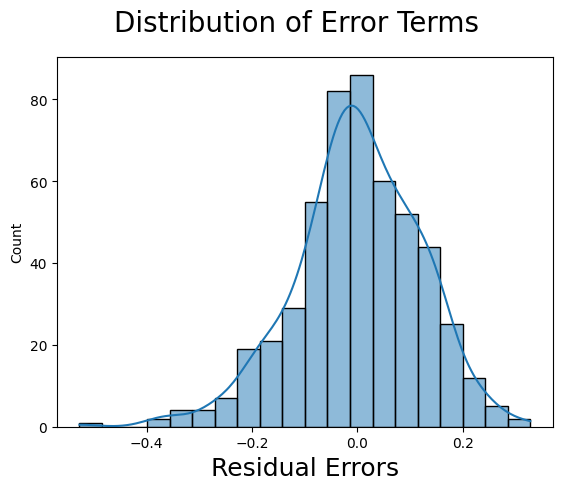

In [438]:
# Create a new figure for the plot
fig = plt.figure()

# Plot the distribution of residuals (errors) using a histogram with KDE
sns.histplot((y_train - y_train_pred), bins=20, kde=True)  # kde=True adds a density curve

# Set the title of the plot
fig.suptitle('Distribution of Error Terms', fontsize=20)

# Label the x-axis to indicate it represents errors
plt.xlabel('Residual Errors', fontsize=18)

# Display the plot
plt.show()

#### Multi Colinearity

In [439]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.06
3,windspeed,2.70
0,year,1.98
1,holiday,1.02


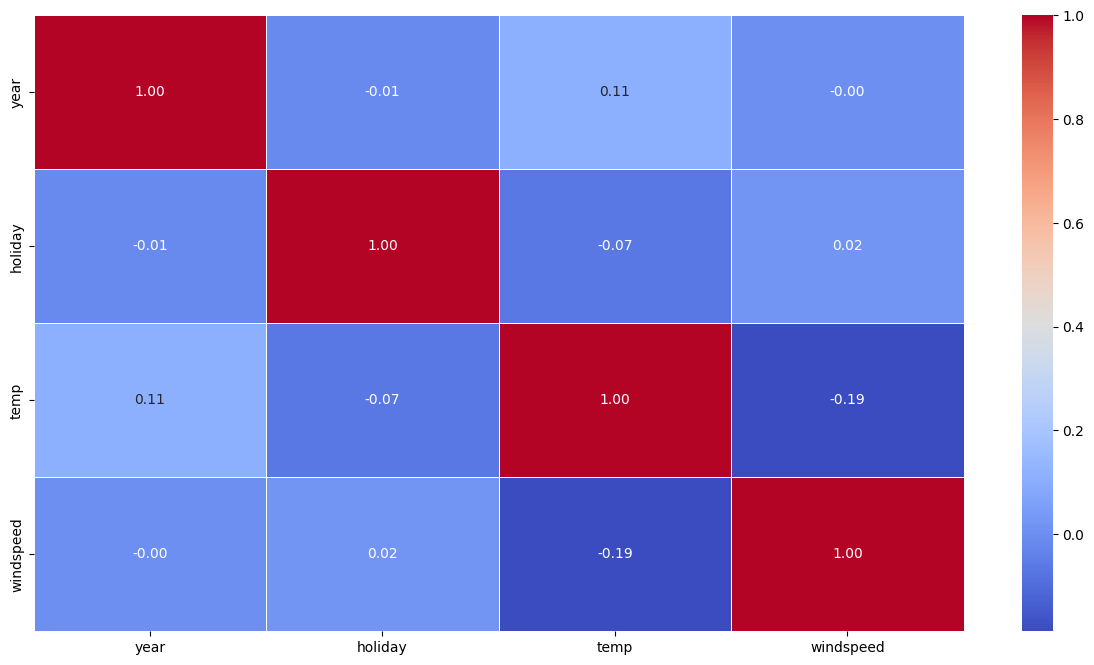

In [440]:

# Set figure size for better readability
plt.figure(figsize=(15, 8))

# Create a heatmap to visualize correlation between features
sns.heatmap(X_train_new.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the plot
plt.show()

VIF values are less than 5 shows it is good and there is no multicolinearity as shown in the heatmap.

#### Linearity 

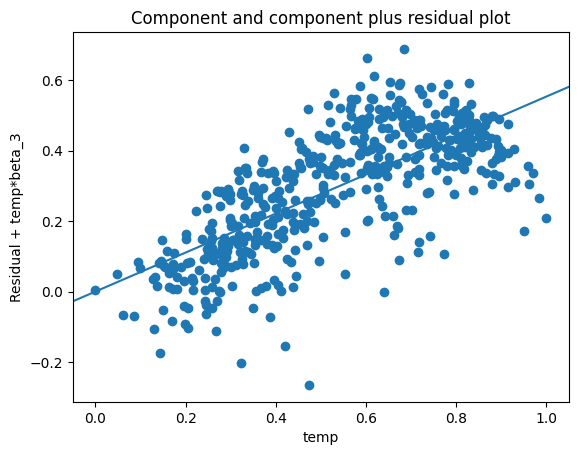

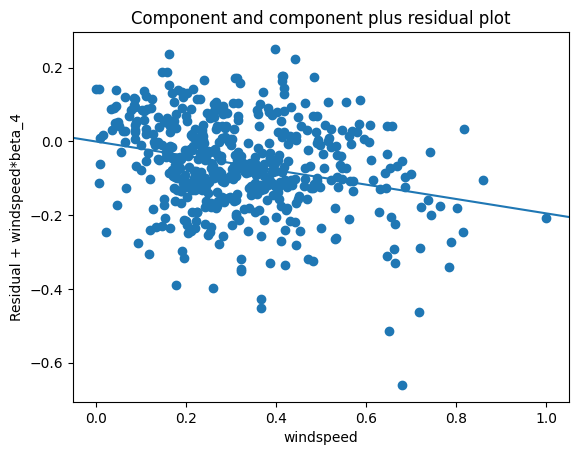

In [441]:
# Generate CCPR plot for 'temp' to assess its linearity with the response variable
sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()


# Generate CCPR plot for 'windspeed' to check its contribution to the model
sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()


Linearity can be observed from above visualizations.

#### Homoscedasticity

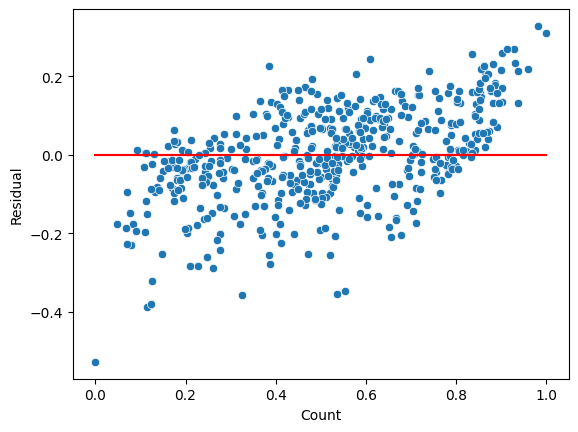

In [442]:
# Predict the target variable using the trained model
y_train_pred = lr_3.predict(X_train_lm_3)

# Calculate residuals (difference between actual and predicted values)
residual = y_train - y_train_pred

# Create a scatter plot to visualize residuals
sns.scatterplot(x=y_train, y=residual)

# Plot a horizontal reference line at zero residuals
plt.plot(y_train, (y_train - y_train), '-r')

# Set axis labels
plt.xlabel('Count')
plt.ylabel('Residual')

# Display the plot
plt.show()


## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 3rd model.

In [443]:
# Define numerical variables to be scaled
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Apply the same scaler used for training to transform the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Display the first few rows of the scaled test dataset
df_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [444]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [445]:
y_test = df_test.pop('cnt')
X_test = df_test

In [446]:
# Get column names from the training dataset
col1 = X_train_new.columns

# Select the same columns in the test dataset to ensure consistency
X_test = X_test[col1]

# Add a constant term to the test dataset for regression analysis
X_test_lm_3 = sm.add_constant(X_test)


In [447]:
y_pred = lr_3.predict(X_test_lm_3)

In [448]:
# Calculate R-squared score to evaluate model performance on the test dataset
r2 = r2_score(y_test, y_pred)

# Round the R-squared value to four decimal places
round(r2, 4)


0.6831

In [449]:
print("Actual y_test values:\n", y_test[:10])
print("Predicted y_pred values:\n", y_pred[:10])


Actual y_test values:
 184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
404    0.438104
198    0.510354
171    0.553728
512    0.692706
200    0.495858
Name: cnt, dtype: float64
Predicted y_pred values:
 184    0.534583
535    0.866319
299    0.377747
221    0.581239
152    0.507004
404    0.475866
198    0.560927
171    0.534326
512    0.714440
200    0.618656
dtype: float64


In [450]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_pred))


Train R²: 0.714951709105359
Test R²: 0.6831300342434317


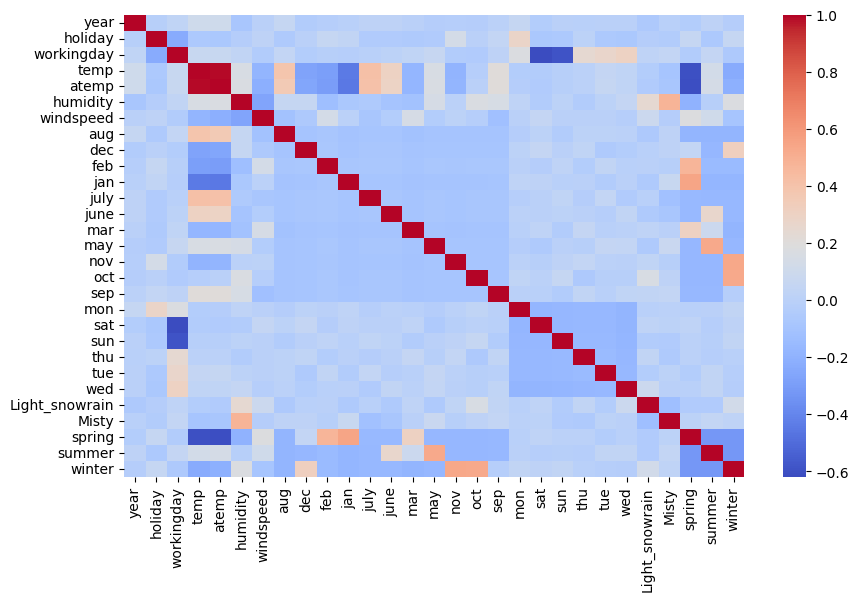

In [451]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), cmap="coolwarm")
plt.show()


In [452]:
corr_matrix = X_train.corr().abs()  # Get absolute correlation values
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

print("Highly Correlated Features to Remove:", high_corr_features)

Highly Correlated Features to Remove: ['atemp']


## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

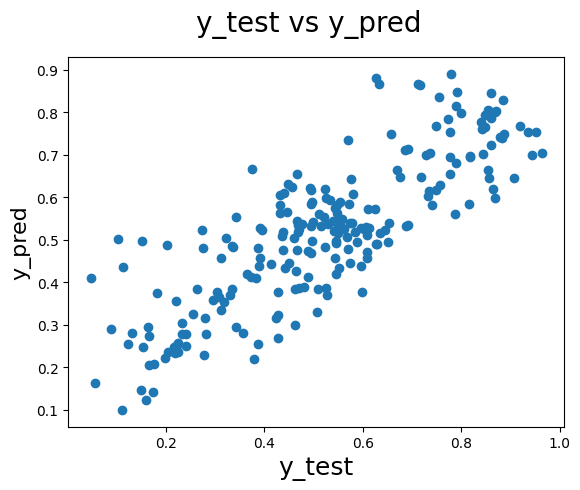

In [453]:
# Create a figure for visualization
fig = plt.figure()

# Scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)

# Set the title and labels for better readability
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Display the plot
plt.show()


In [454]:
round(lr_3.params,4)

const        0.1597
year         0.2379
holiday     -0.0689
temp         0.5533
windspeed   -0.1952
dtype: float64

In [455]:
# Calculate the Adjusted R-squared value for the test dataset
adjusted_r2 = round(1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1), 4)

# Print the Adjusted R-squared value
print(adjusted_r2)


0.6772


In [457]:
# Predict on Train Data
y_train_pred = lr_3.predict(X_train_lm_3)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)

# Compute Adjusted R²
n = X_train.shape[0]  # Number of samples
p = X_train.shape[1]  # Number of predictors
adjusted_r2_train = round(1 - (1 - r2_train) * (n - 1) / (n - p - 1), 4)

print("Train Dataset Adjusted R²:", adjusted_r2_train)


Train Dataset Adjusted R²: 0.6977


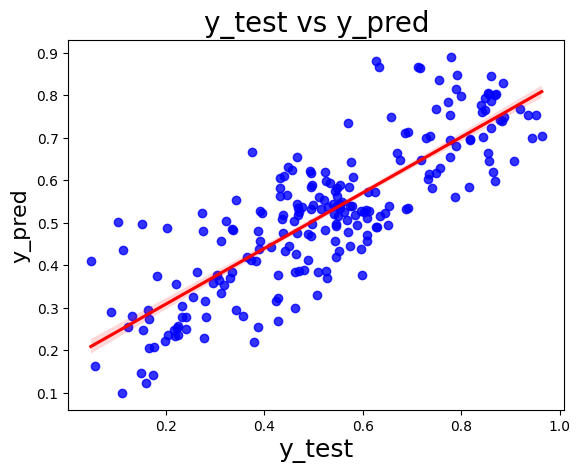

In [456]:
# Create a figure for visualization
plt.figure()

# Regression plot to compare actual vs predicted values with confidence interval
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Set the title and labels for better readability
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Display the plot
plt.show()


# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.715
    - Test dataset R^2           : 0.683
    - Train dataset Adjusted R^2 : 0.6977    
    - Test dataset Adjusted R^2  : 0.6772

#### Demand of bikes depend on year, holiday, temp, windspeed